In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/sreya/Downloads/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
print('Our dataset')
print('Dimensions: ' + str(df.shape))
print(df.info())

Our dataset
Dimensions: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [6]:
df_modified = df.drop(columns = ['RowNumber'])
df_modified

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df_modified.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df_modified.duplicated().value_counts()

False    10000
dtype: int64

In [9]:
df_modified['Gender'] = df_modified['Gender'].map({'Male' : 0, 'Female' : 1})
print(df_modified['Gender'].head())

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64


In [10]:
df_modified

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df_modified['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
#no_exited = df_modified[df_modified.Exited == 0]
#exited = df_modified[df_modified.Exited == 1]

In [13]:
#print(no_exited.shape)
#print(exited.shape)

In [14]:
#exist_sample = no_exited.sample(n=5000)
#print(exist_sample.shape)

In [15]:
#new_dataset = pd.concat([exist_sample, exited], axis=0)
#new_dataset.head()

In [16]:
#new_dataset.shape

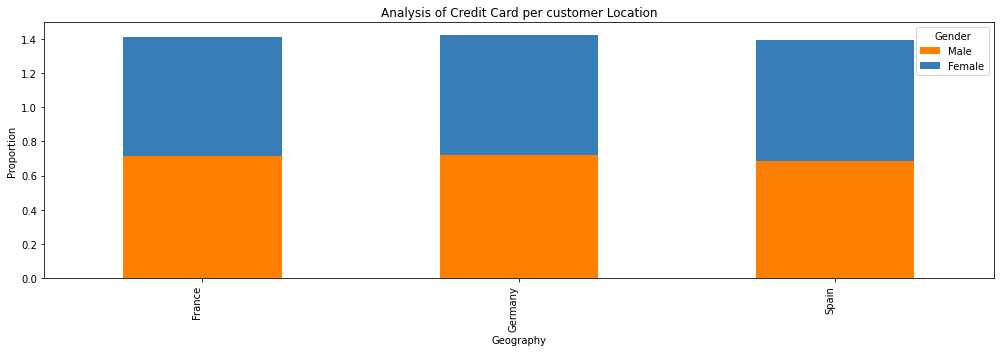

In [17]:
cus_has_credcard = df_modified.groupby(['Geography', 'Gender'])['HasCrCard'].mean().unstack()
fig, ax = plt.subplots(figsize=(14, 5))
cus_has_credcard.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of Credit Card per customer Location')
plt.xlabel('Geography')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

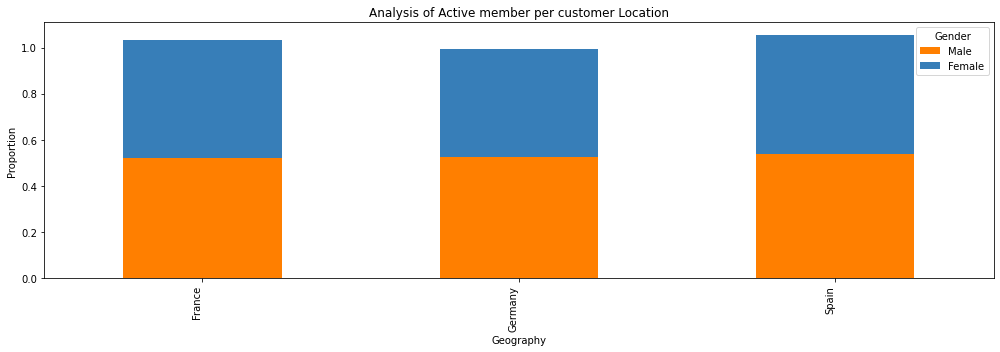

In [18]:
cus_is_active_member = df_modified.groupby(['Geography', 'Gender'])['IsActiveMember'].mean().unstack()
fig, ax = plt.subplots(figsize=(14, 5))
cus_is_active_member.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of Active member per customer Location')
plt.xlabel('Geography')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

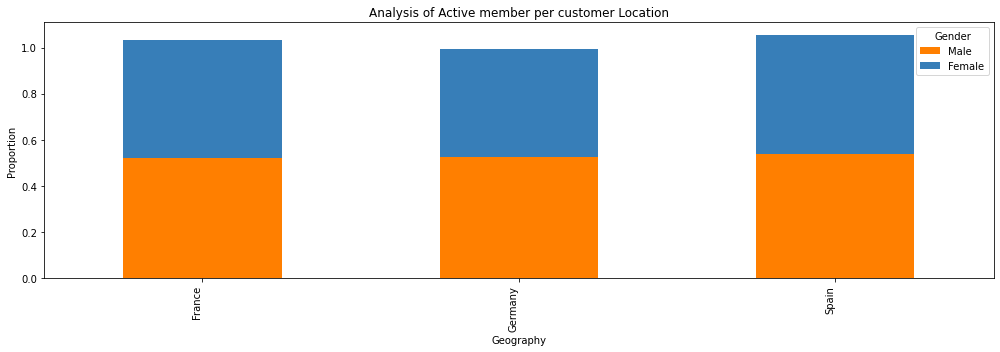

In [19]:
cus_exited = df_modified.groupby(['Geography', 'Gender'])['IsActiveMember'].mean().unstack()
fig, ax = plt.subplots(figsize=(14, 5))
cus_exited.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of Active member per customer Location')
plt.xlabel('Geography')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

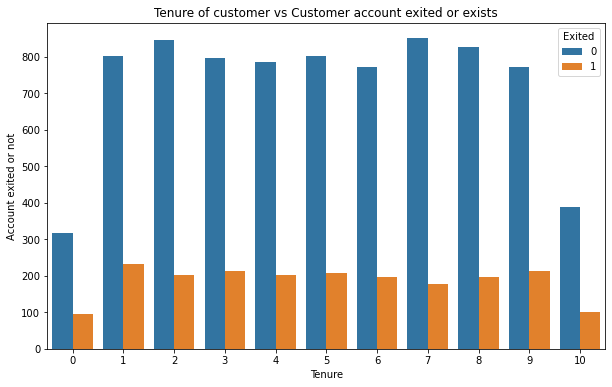

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_modified, x='Tenure', hue='Exited')
plt.title('Tenure of customer vs Customer account exited or exists')
plt.xlabel('Tenure')
plt.ylabel('Account exited or not')
plt.legend(title='Exited')
plt.show()

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

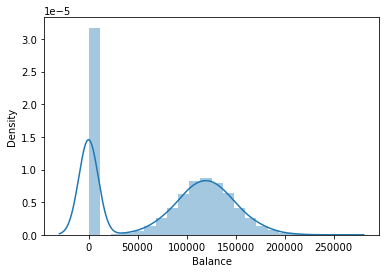

In [21]:
sns.distplot(df_modified['Balance'])

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

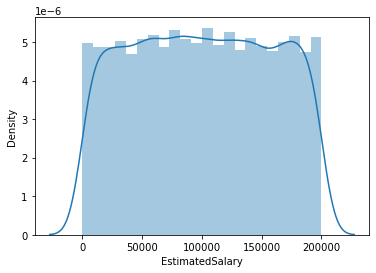

In [22]:
sns.distplot(df_modified['EstimatedSalary'])

In [23]:
df_modified.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

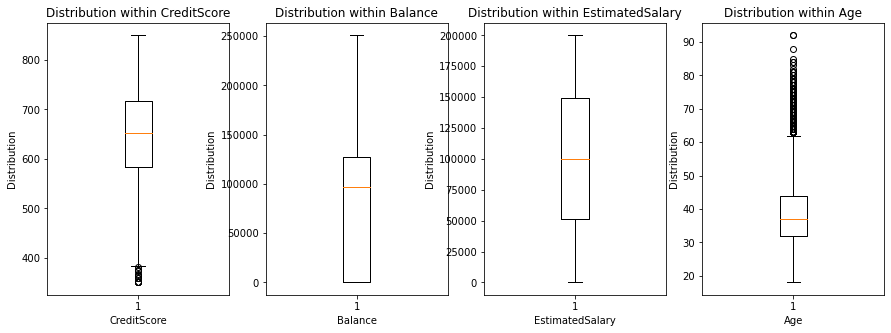

In [24]:
num_cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(df_modified[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")

plt.show()

In [25]:
def outlier_replacement(column):
    #type 1 = IQR by default, else= median replacement
    # Get quartiles and IQR range
    Q1 = df_modified[column].quantile(0.25)
    Q2 = df_modified[column].quantile(0.50)
    Q3 = df_modified[column].quantile(0.75)
    IQR = Q3 -Q1
    # Replace values with either medain or IQR min/max values
    # Replace outliers with median value
    df_modified[column]= np.where(df_modified[column]> (Q3 +1.5 * IQR), Q2, df_modified[column])
    df_modified[column] =np.where(df_modified[column]< (Q1 -1.5 *IQR), Q2, df_modified[column])
    
outlier_replacement("CreditScore")
outlier_replacement("Age")

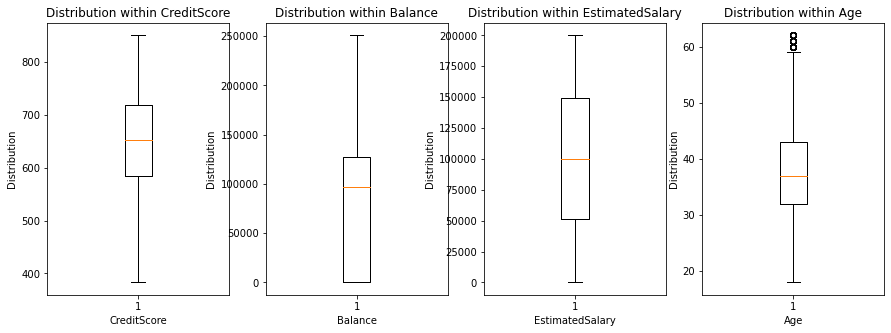

In [26]:
num_cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(df_modified[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")

plt.show()

In [27]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

In [28]:
import statistics as stats
def get_aggregates(column):
    avg = np.mean(df_modified[column])
    std = np.std(df_modified[column])
    unique_count = len(df_modified[column].unique())
    print("\n - " + column + ":")
    print("Mean: ", avg)
    print("Median: ", np.median(df_modified[column]))
    print("Mode: ", stats.mode(df_modified[column]))
    print("Standard Deviation: ", std)
    print("Unique values: " + str(unique_count))
    
for column in num_cols:
    get_aggregates(column)


 - CreditScore:
Mean:  650.9648
Median:  652.0
Mode:  850.0
Standard Deviation:  95.99535072575112
Unique values: 450

 - Balance:
Mean:  76485.88928799961
Median:  97198.54000000001
Mode:  0.0
Standard Deviation:  62394.285254125454
Unique values: 6382

 - EstimatedSalary:
Mean:  100090.2398809998
Median:  100193.915
Mode:  24924.92
Standard Deviation:  57507.61722116562
Unique values: 9999

 - Age:
Mean:  37.7633
Median:  37.0
Mode:  37.0
Standard Deviation:  8.64447066684826
Unique values: 45


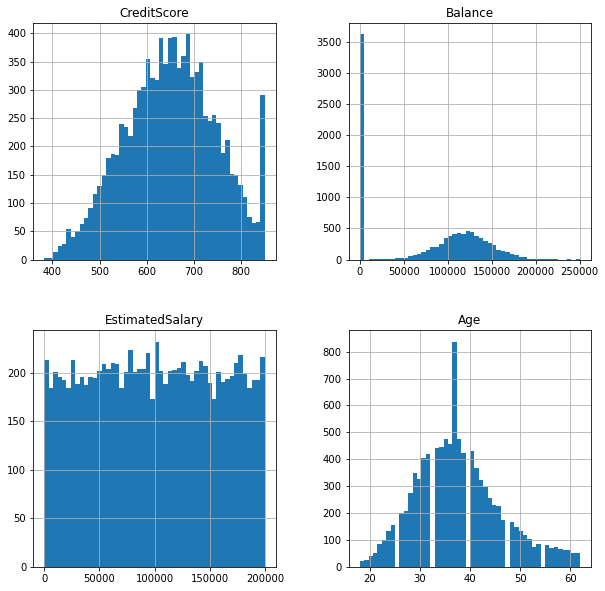

In [29]:
df_modified[num_cols].hist(bins=50, figsize=(10, 10))
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Surname', 'Geography']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_modified[col] = le.fit_transform(df_modified[col])
    label_encoders[col] = le

In [31]:
df_modified.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619.0,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608.0,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502.0,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699.0,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850.0,2,1,43.0,2,125510.82,1,1,1,79084.10,0


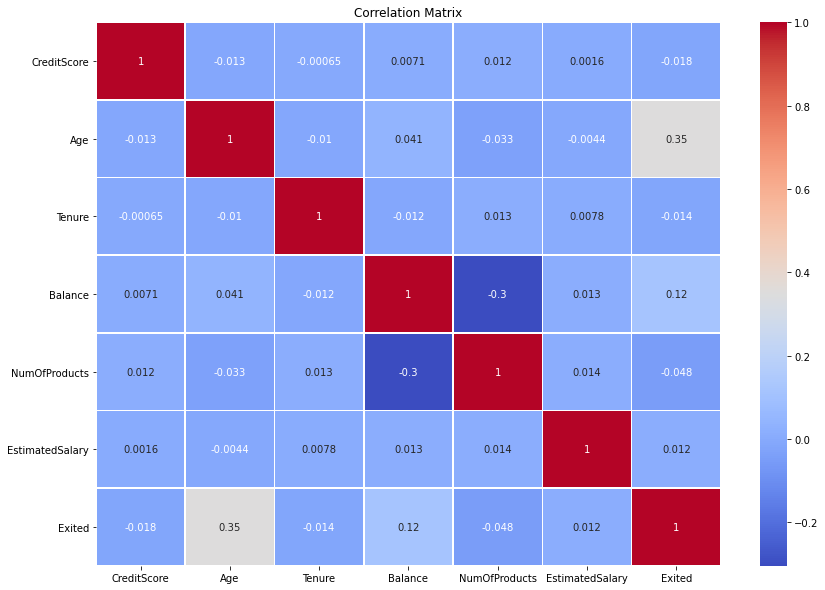

In [32]:
correlation_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

correlation_matrix = df_modified[correlation_columns].corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

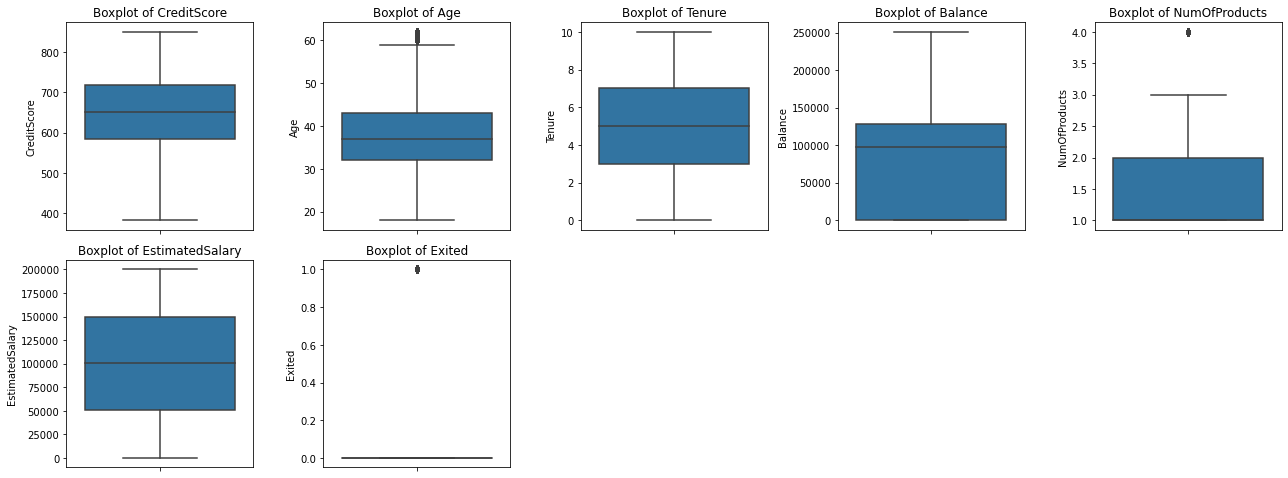

In [34]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

plt.figure(figsize=(18, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)  # Adjust the grid size as needed
    sns.boxplot(y=df_modified[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()  # Adjusts subplots to give some padding
plt.show()

In [35]:
df_modified

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619.0,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608.0,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502.0,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699.0,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850.0,2,1,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771.0,0,0,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,1336,516.0,0,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,1570,709.0,0,1,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,2345,772.0,1,0,42.0,3,75075.31,2,1,0,92888.52,1


In [36]:
X = df_modified[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Geography', 'Surname', 'HasCrCard']].values
y = df_modified['Exited'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
X_train_prediction = logreg.predict(X_train)
X_train_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
X_test_prediction = logreg.predict(X_test)
X_test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [43]:
print('Accuracy_score:', training_data_accuracy)

Accuracy_score: 0.7952857142857143


In [44]:
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.8113333333333334


In [45]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [46]:
cr = classification_report(y_test, X_test_prediction)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.56      0.14      0.22       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.56      3000
weighted avg       0.77      0.81      0.76      3000



In [47]:
cr = classification_report(y_train, X_train_prediction)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      5547
           1       0.53      0.12      0.20      1453

    accuracy                           0.80      7000
   macro avg       0.67      0.55      0.54      7000
weighted avg       0.75      0.80      0.74      7000



In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      2416
           1       0.31      0.67      0.42       584

    accuracy                           0.64      3000
   macro avg       0.60      0.65      0.58      3000
weighted avg       0.78      0.64      0.68      3000



In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      2416
           1       0.30      0.67      0.41       584

    accuracy                           0.63      3000
   macro avg       0.59      0.65      0.57      3000
weighted avg       0.77      0.63      0.67      3000



In [50]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.56      0.14      0.22       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.56      3000
weighted avg       0.77      0.81      0.76      3000



In [51]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      2416
           1       0.31      0.66      0.42       584

    accuracy                           0.64      3000
   macro avg       0.60      0.65      0.58      3000
weighted avg       0.77      0.64      0.68      3000



In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'scale_pos_weight': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.59      0.73      2416
           1       0.33      0.85      0.48       584

    accuracy                           0.64      3000
   macro avg       0.64      0.72      0.60      3000
weighted avg       0.82      0.64      0.68      3000



In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Base models
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dtree', DecisionTreeClassifier(random_state=42))
]

# Meta-model
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Train the Stacking Classifier
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2416
           1       0.72      0.42      0.53       584

    accuracy                           0.85      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000



In [54]:
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dtree', DecisionTreeClassifier(random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=5), cv=5
)

clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2416
           1       0.58      0.41      0.48       584

    accuracy                           0.83      3000
   macro avg       0.73      0.67      0.69      3000
weighted avg       0.81      0.83      0.82      3000



In [55]:
estimators = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dtree', DecisionTreeClassifier(random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=5
)

clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2416
           1       0.45      0.26      0.33       584

    accuracy                           0.79      3000
   macro avg       0.64      0.59      0.60      3000
weighted avg       0.76      0.79      0.77      3000



In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, scoring='recall', cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred))

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.74      0.43      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Define class weights
class_weights = {0: 1, 1: 10}

# Initialize and train the model
model = GradientBoostingClassifier()  # Note: GradientBoostingClassifier does not support class_weight directly
model.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred))

Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.74      0.43      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [58]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=estimators, voting='soft')

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2416
           1       0.56      0.09      0.16       584

    accuracy                           0.81      3000
   macro avg       0.69      0.54      0.53      3000
weighted avg       0.77      0.81      0.75      3000



In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_train, y_train, X_test, y_test are already defined

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold to 0.3
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the adjusted predictions
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2416
           1       0.51      0.66      0.57       584

    accuracy                           0.81      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.81      0.82      3000



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2416
           1       0.35      0.42      0.38       584

    accuracy                           0.74      3000
   macro avg       0.60      0.62      0.61      3000
weighted avg       0.76      0.74      0.74      3000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2416
           1       0.44      0.24      0.31       584

    accuracy                           0.79      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.76      0.79      0.77      3000

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.56      0.14      0.22       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.56      3000
weighted avg       0.77      

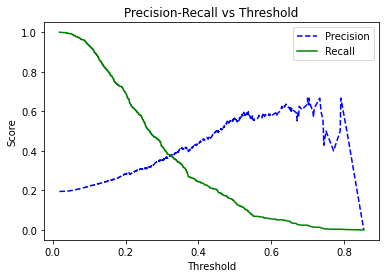

Classification Report at Threshold = 0.4
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2416
           1       0.44      0.24      0.31       584

    accuracy                           0.79      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.76      0.79      0.77      3000



In [60]:
from sklearn.metrics import precision_recall_curve

model = LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.show()

optimal_threshold = 0.4
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print(f"Classification Report at Threshold = {optimal_threshold}")
print(classification_report(y_test, y_pred_optimal))

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2416
           1       0.50      0.66      0.57       584

    accuracy                           0.81      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.81      0.82      3000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2416
           1       0.61      0.57      0.59       584

    accuracy                           0.85      3000
   macro avg       0.75      0.74      0.75      3000
weighted avg       0.84      0.85      0.84      3000

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2416
           1       0.72      0.42      0.53       584

    accuracy                           0.86      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      

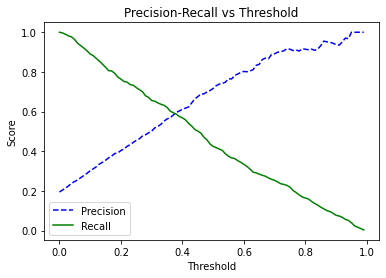

Classification Report at Threshold = 0.4
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2416
           1       0.61      0.57      0.59       584

    accuracy                           0.85      3000
   macro avg       0.75      0.74      0.75      3000
weighted avg       0.84      0.85      0.84      3000



In [61]:
from sklearn.metrics import precision_recall_curve

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.show()

optimal_threshold = 0.4
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print(f"Classification Report at Threshold = {optimal_threshold}")
print(classification_report(y_test, y_pred_optimal))

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Initialize and train the model with class weights
model = GradientBoostingClassifier(n_estimators=100)  
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report with Cost-Sensitive Learning:")
print(classification_report(y_test, y_pred))

Classification Report with Cost-Sensitive Learning:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.45      0.56       584

    accuracy                           0.86      3000
   macro avg       0.80      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [63]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

model = EasyEnsembleClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report with EasyEnsemble Classifier:")
print(classification_report(y_test, y_pred))

Classification Report with EasyEnsemble Classifier:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2416
           1       0.44      0.71      0.54       584

    accuracy                           0.77      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.83      0.77      0.79      3000



In [64]:
from imblearn.ensemble import RUSBoostClassifier
model = RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report with RUSBoost:")
print(classification_report(y_test, y_pred))

Classification Report with RUSBoost:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2416
           1       0.35      0.27      0.30       584

    accuracy                           0.76      3000
   macro avg       0.59      0.57      0.58      3000
weighted avg       0.74      0.76      0.75      3000



In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

smote = SMOTE(random_state=42)
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('ada', ada_boost)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report with SMOTE and AdaBoost:")
print(classification_report(y_test, y_pred))

Classification Report with SMOTE and AdaBoost:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2416
           1       0.61      0.53      0.57       584

    accuracy                           0.84      3000
   macro avg       0.75      0.73      0.74      3000
weighted avg       0.84      0.84      0.84      3000



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
smote = SMOTE(random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('gb', gradient_boosting)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report with SMOTE and Gradient Boosting:")
print(classification_report(y_test, y_pred))

Classification Report with SMOTE and Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2416
           1       0.64      0.54      0.58       584

    accuracy                           0.85      3000
   macro avg       0.76      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [67]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report with EasyEnsemble Classifier:")
print(classification_report(y_test, y_pred))

C:\Users\sreya\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\sreya\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\sreya\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report with EasyEnsemble Classifier:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2416
           1       0.45      0.74      0.56       584

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.77      0.79      3000



In [68]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('smote', borderline_smote), ('clf', rf_classifier)])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report with Borderline-SMOTE:")
print(classification_report(y_test, y_pred))

Classification Report with Borderline-SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2416
           1       0.66      0.50      0.57       584

    accuracy                           0.85      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [69]:
from imblearn.ensemble import BalancedBaggingClassifier
balanced_bagging = BalancedBaggingClassifier(estimator=RandomForestClassifier(n_estimators=50), n_estimators=100, random_state=42)

# Train the model
balanced_bagging.fit(X_train, y_train)

# Predict
y_pred = balanced_bagging.predict(X_test)

# Print classification report
print("Classification Report with BalancedBaggingClassifier:")
print(classification_report(y_test, y_pred))

Classification Report with BalancedBaggingClassifier:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      2416
           1       0.50      0.69      0.58       584

    accuracy                           0.81      3000
   macro avg       0.71      0.76      0.73      3000
weighted avg       0.84      0.81      0.82      3000



In [70]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', BalancedBaggingClassifier(estimator=RandomForestClassifier(n_estimators=50), n_estimators=100, random_state=42)),
    ('gb', BalancedBaggingClassifier(estimator=GradientBoostingClassifier(n_estimators=50), n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Define stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Print classification report
print("Classification Report with Stacking Classifier:")
print(classification_report(y_test, y_pred))

Classification Report with Stacking Classifier:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2416
           1       0.68      0.49      0.57       584

    accuracy                           0.86      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.85      0.86      0.85      3000



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2416
           1       0.44      0.46      0.45       584

    accuracy                           0.78      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.78      0.78      0.78      3000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2416
           1       0.44      0.46      0.45       584

    accuracy                           0.78      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.78      0.78      0.78      3000

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2416
           1       0.44      0.46      0.45       584

    accuracy                           0.78      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.78      

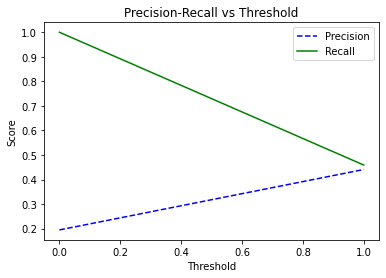

Classification Report at Threshold = 0.4
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2416
           1       0.44      0.46      0.45       584

    accuracy                           0.78      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.78      0.78      0.78      3000



In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.show()

optimal_threshold = 0.4
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print(f"Classification Report at Threshold = {optimal_threshold}")
print(classification_report(y_test, y_pred_optimal))

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      2416
           1       0.22      0.38      0.28       584

    accuracy                           0.61      3000
   macro avg       0.52      0.52      0.50      3000
weighted avg       0.70      0.61      0.64      3000

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2416
           1       0.21      0.17      0.19       584

    accuracy                           0.72      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.69      0.72      0.70      3000

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2416
           1       0.27      0.07      0.11       584

    accuracy                           0.78      3000
   macro avg       0.54      0.51      0.49      3000
weighted avg       0.70      

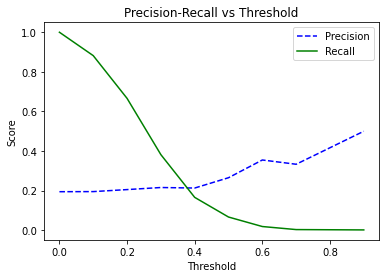

Classification Report at Threshold = 0.4
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2416
           1       0.21      0.17      0.19       584

    accuracy                           0.72      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.69      0.72      0.70      3000



In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.show()

optimal_threshold = 0.4
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)
print(f"Classification Report at Threshold = {optimal_threshold}")
print(classification_report(y_test, y_pred_optimal))

In [73]:
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [75]:
X_train_pred = knn.predict(X_train)
X_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
training_data_acc = accuracy_score(X_train_pred, y_train)
training_data_acc

0.7954285714285714

In [77]:
X_test_pred = knn.predict(X_test)
X_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
test_data_acc = accuracy_score(X_test_pred, y_test)
test_data_acc

0.8023333333333333

In [79]:
cr = classification_report(y_test, X_test_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      2416
           1       0.35      0.02      0.04       584

    accuracy                           0.80      3000
   macro avg       0.58      0.51      0.46      3000
weighted avg       0.72      0.80      0.72      3000



In [80]:
cr = classification_report(y_train, X_train_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      5547
           1       0.60      0.04      0.08      1453

    accuracy                           0.80      7000
   macro avg       0.70      0.52      0.48      7000
weighted avg       0.76      0.80      0.72      7000



In [81]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [82]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
X_train_predict = dtree.predict(X_train)
X_train_predict

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [84]:
train_data_acc = accuracy_score(X_train_predict, y_train)
train_data_acc

1.0

In [85]:
X_test_predict = knn.predict(X_test)
X_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
test_data_acc = accuracy_score(X_test_predict, y_test)
test_data_acc

0.8023333333333333

In [87]:
cr = classification_report(y_test, X_test_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      2416
           1       0.35      0.02      0.04       584

    accuracy                           0.80      3000
   macro avg       0.58      0.51      0.46      3000
weighted avg       0.72      0.80      0.72      3000



In [88]:
cr = classification_report(y_train, X_train_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5547
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2416
           1       0.21      0.14      0.17       584

    accuracy                           0.73      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.69      0.73      0.71      3000



In [90]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.82      0.59      0.68      2416
           1       0.21      0.46      0.29       584

    accuracy                           0.56      3000
   macro avg       0.52      0.53      0.49      3000
weighted avg       0.70      0.56      0.61      3000



In [91]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracies: [0.8425 0.8395 0.851  0.854  0.849 ]
Mean cross-validation accuracy: 0.8472


In [92]:
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [93]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
X_train_prediction_rf = model.predict(X_train)
X_train_prediction_rf

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [95]:
X_test_prediction_rf = logreg.predict(X_test)
X_test_prediction_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
training_data_accuracy = accuracy_score(X_train_prediction_rf, y_train)
training_data_accuracy

1.0

In [97]:
print('Accuracy_score:', training_data_accuracy)

Accuracy_score: 1.0


In [98]:
test_data_accuracy = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.8113333333333334


In [99]:
cr = classification_report(y_test, X_test_prediction_rf)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2416
           1       0.56      0.14      0.22       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.56      3000
weighted avg       0.77      0.81      0.76      3000



In [100]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Create a pipeline that first applies SMOTE, then fits the Random Forest
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', rf)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2416
           1       0.64      0.49      0.56       584

    accuracy                           0.85      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000

